## Strategy and Analysis for Milk Production

Author: HermanowyczN

In [ ]:
pip install statsmodels

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import random

buan = pd.read_csv("buan685_hw2_monthly_milk_production.csv", parse_dates=True, index_col='Date')  
print(buan)

            Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727
...                ...
1975-08-01         858
1975-09-01         817
1975-10-01         827
1975-11-01         797
1975-12-01         843

[168 rows x 1 columns]


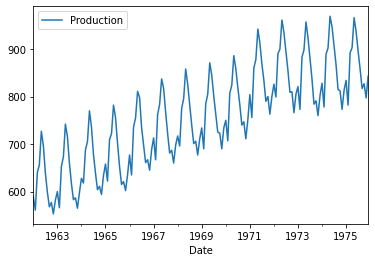

In [36]:
buan.plot()

## Moving Average

In [37]:
production = buan['1962-01-01':'1975-12-01']

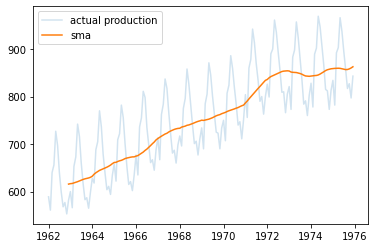

In [38]:
plt.plot(production, alpha=0.2, label= 'actual production')
plt.plot(production.rolling(12).mean(), label = 'sma')
plt.legend() 

In [40]:
production['sma'] = production.rolling(12).mean()

<ipython-input-40-0691539ef46b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production['sma'] = production.rolling(12).mean()


In [41]:
production[:20]

,Production,sma
Date,,
1962-01-01,589,NaN
1962-02-01,561,NaN
1962-03-01,640,NaN
1962-04-01,656,NaN
1962-05-01,727,NaN
1962-06-01,697,NaN
1962-07-01,640,NaN
1962-08-01,599,NaN
1962-09-01,568,NaN


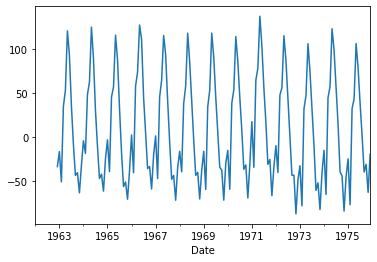

In [42]:
(production['Production'] - production['sma']).plot()

In [43]:
production['detrended'] = production['Production'] - production['sma']

<ipython-input-43-e4efed51a956>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production['detrended'] = production['Production'] - production['sma']


In [44]:
production

,Production,sma,detrended
Date,,,
1962-01-01,589,NaN,NaN
1962-02-01,561,NaN,NaN
1962-03-01,640,NaN,NaN
1962-04-01,656,NaN,NaN
1962-05-01,727,NaN,NaN
...,...,...,...
1975-08-01,858,856.750000,1.250000
1975-09-01,817,856.916667,-39.916667
1975-10-01,827,858.166667,-31.166667


In [45]:
production['month_of_year'] = production.index.month
production['year'] = production.index.year


<ipython-input-45-ce1645efb531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production['month_of_year'] = production.index.month
<ipython-input-45-ce1645efb531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production['year'] = production.index.year


In [46]:
production

,Production,sma,detrended,month_of_year,year
Date,,,,,
1962-01-01,589,NaN,NaN,1,1962
1962-02-01,561,NaN,NaN,2,1962
1962-03-01,640,NaN,NaN,3,1962
1962-04-01,656,NaN,NaN,4,1962
1962-05-01,727,NaN,NaN,5,1962
...,...,...,...,...,...
1975-08-01,858,856.750000,1.250000,8,1975
1975-09-01,817,856.916667,-39.916667,9,1975
1975-10-01,827,858.166667,-31.166667,10,1975


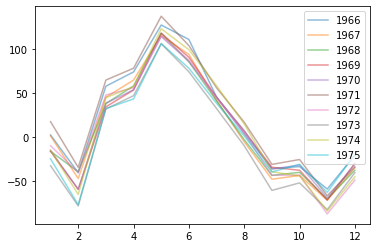

In [53]:
for y in production['year'].unique()[-10:]:
    plt.plot(range(1, 13), production[production['year']== y]['detrended'], label=y, alpha=0.5)
plt.legend()

In [55]:
production['1962-01-01':].groupby('month_of_year')['detrended'].mean().reset_index()

,month_of_year,detrended
0,1,-10.282051
1,2,-50.237179
2,3,43.532051
3,4,58.564103
4,5,119.108974
5,6,91.185897
6,7,42.160256
7,8,-0.038462
8,9,-43.250000
9,10,-39.929487


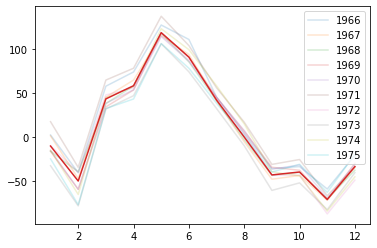

In [56]:
for y in production['year'].unique()[-10:]:
    plt.plot(range(1,13), production[production['year'] == y]['detrended'], label=y, alpha=0.2) 
plt.legend()
plt.plot(production['1962-01-01':].groupby('month_of_year')['detrended'].mean(), color = "C3")

In [57]:
seasonality = production['1962-01-01':].groupby('month_of_year')['detrended'].mean().rename('seasonality').reset_index()
seasonality

,month_of_year,seasonality
0,1,-10.282051
1,2,-50.237179
2,3,43.532051
3,4,58.564103
4,5,119.108974
5,6,91.185897
6,7,42.160256
7,8,-0.038462
8,9,-43.250000
9,10,-39.929487


In [59]:
production

,Production,sma,detrended,month_of_year,year
Date,,,,,
1962-01-01,589,NaN,NaN,1,1962
1962-02-01,561,NaN,NaN,2,1962
1962-03-01,640,NaN,NaN,3,1962
1962-04-01,656,NaN,NaN,4,1962
1962-05-01,727,NaN,NaN,5,1962
...,...,...,...,...,...
1975-08-01,858,856.750000,1.250000,8,1975
1975-09-01,817,856.916667,-39.916667,9,1975
1975-10-01,827,858.166667,-31.166667,10,1975


In [81]:
production.reset_index().merge(seasonality, on='month_of_year').set_index('Date').sort_index()

,Production,sma,detrended,month_of_year,year,seasonality_x,seasonality_y
Date,,,,,,,
1962-01-01,589,NaN,NaN,1,1962,-10.282051,-10.282051
1962-02-01,561,NaN,NaN,2,1962,-50.237179,-50.237179
1962-03-01,640,NaN,NaN,3,1962,43.532051,43.532051
1962-04-01,656,NaN,NaN,4,1962,58.564103,58.564103
1962-05-01,727,NaN,NaN,5,1962,119.108974,119.108974
...,...,...,...,...,...,...,...
1975-08-01,858,856.750000,1.250000,8,1975,-0.038462,-0.038462
1975-09-01,817,856.916667,-39.916667,9,1975,-43.250000,-43.250000
1975-10-01,827,858.166667,-31.166667,10,1975,-39.929487,-39.929487


In [ ]:
production = production.reset_index().merge(seasonality, on='month_of_year').set_index('Date').sort_index()

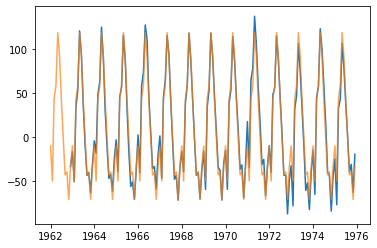

In [77]:
plt.plot(production['detrended'])
plt.plot(production['seasonality'],alpha = 0.7)

In [83]:
production['residual'] = production['Production'] - production['sma'] - production['seasonality']

In [84]:
production

,Production,sma,detrended,month_of_year,year,seasonality,residual
Date,,,,,,,
1962-01-01,589,NaN,NaN,1,1962,-10.282051,NaN
1962-02-01,561,NaN,NaN,2,1962,-50.237179,NaN
1962-03-01,640,NaN,NaN,3,1962,43.532051,NaN
1962-04-01,656,NaN,NaN,4,1962,58.564103,NaN
1962-05-01,727,NaN,NaN,5,1962,119.108974,NaN
...,...,...,...,...,...,...,...
1975-08-01,858,856.750000,1.250000,8,1975,-0.038462,1.288462
1975-09-01,817,856.916667,-39.916667,9,1975,-43.250000,3.333333
1975-10-01,827,858.166667,-31.166667,10,1975,-39.929487,8.762821


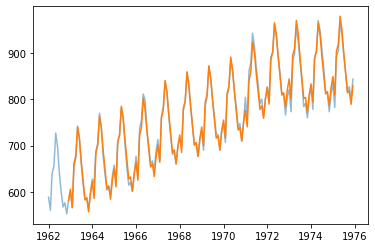

In [92]:
plt.plot(production['Production'], alpha=0.5)
plt.plot(production['sma'] + production['seasonality'])

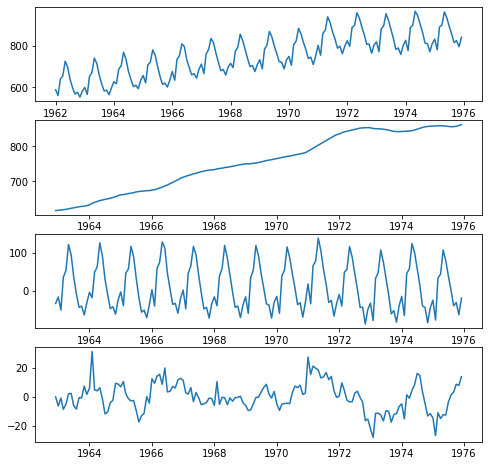

In [91]:
plt.subplots(figsize=(8,8))
plt.subplot(4, 1, 1)
plt.plot(production['Production'])
plt.subplot(4, 1, 2)
plt.plot(production['sma'])
plt.subplot(4, 1, 3)
plt.plot(production['detrended'])
plt.subplot(4, 1, 4)
plt.plot(production['residual'])

In [87]:
production['residual'].dropna()

Date
1962-12-01    -0.041667
1963-01-01    -6.384615
1963-02-01    -0.846154
1963-03-01    -8.698718
1963-04-01    -5.147436
                ...    
1975-08-01     1.288462
1975-09-01     3.333333
1975-10-01     8.762821
1975-11-01     8.019231
1975-12-01    14.041667
Name: residual, Length: 157, dtype: float64

In [93]:
rmse = (production['residual'].dropna() ** 2).mean()**0.5
print('RMSE:', rmse)

RMSE: 9.981805999818848


## Milk Production Under ETS

In [97]:
ets_df = pd.read_csv("buan685_hw2_monthly_milk_production.csv", parse_dates=True, index_col='Date')
ets_df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


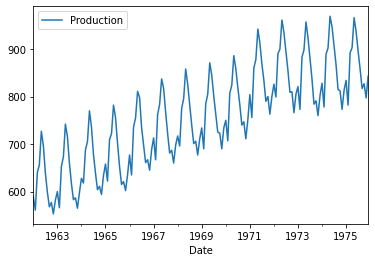

In [98]:
ets_df.plot()

In [99]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [104]:
model = ETSModel(
    ets_df['Production'].astype(float), 
    error = 'mul', 
    trend = 'add', 
    seasonal = 'mul',
    seasonal_periods=12, freq='1MS')

In [105]:
fit = model.fit()

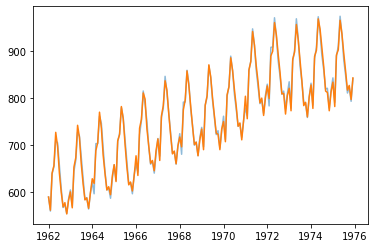

In [109]:
plt.plot(fit.fittedvalues, alpha=0.5)
plt.plot(ets_df['Production'])

In [115]:
#fit.param_names
fit.params

0     9.999000e-01
1     9.999000e-05
2     1.000000e-08
3     5.871373e+02
4     1.801528e+00
5     9.663167e-01
6     9.168492e-01
7     9.580066e-01
8     9.530768e-01
9     1.010642e+00
10    1.069077e+00
11    1.138539e+00
12    1.178057e+00
13    1.093894e+00
14    1.073391e+00
15    9.462668e-01
16    1.000000e+00
dtype: float64

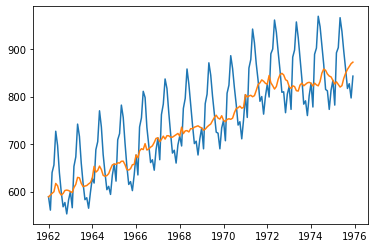

In [113]:
plt.plot(ets_df['Production'])
plt.plot(fit.level)

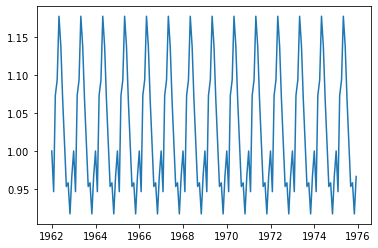

In [116]:
plt.plot(fit.season)

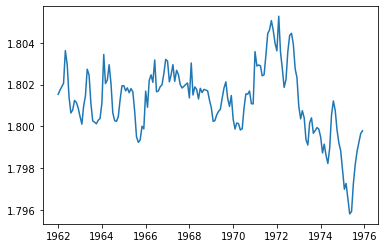

In [117]:
plt.plot(fit.slope)

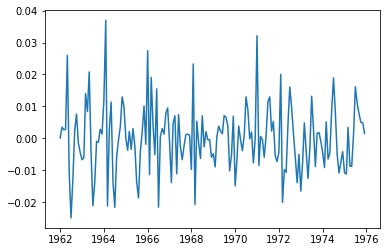

In [118]:
plt.plot(fit.resid)

## Training Data

In [123]:
train = ets_df[:-10]
test = ets_df[-10:]


fit.fittedvalues

Date
1962-01-01    588.938856
1962-02-01    559.055872
1962-03-01    638.300281
1962-04-01    654.195401
1962-05-01    708.594484
                 ...    
1975-08-01    848.840588
1975-09-01    810.841723
1975-10-01    822.948567
1975-11-01    793.120092
1975-12-01    841.739852
Length: 168, dtype: float64

In [124]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-10-01,812
1974-11-01,773
1974-12-01,813


In [129]:
rmse_train = ((fit.fittedvalues - train['Production'])**2).mean()**0.5
print('Training RMSE:', rmse_train)

Training RMSE: 7.682673012230933


The RMSE on the training data yiled a smaller amount that the SMA. SMA yielded an rmse ~9.9. Training data yielded and rmse of ~7.6. 